In [37]:
import pandas as pd
import unidecode
from sqlalchemy import create_engine, MetaData, inspect
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [1]:


# Read data
customers = pd.read_csv('BRAZ/olist_customers_dataset.csv')

# Gold layer processing
customers_gold = customers.copy()

# Standardize text columns
customers_gold['customer_city'] = customers_gold['customer_city'].str.strip().str.lower().apply(unidecode.unidecode)
customers_gold['customer_state'] = customers_gold['customer_state'].str.strip().str.upper()

# Remove duplicates (if any)
customers_gold = customers_gold.drop_duplicates(subset=['customer_id'])

# Save Gold layer
customers_gold.to_csv('BRAZ/gold/olist_customers_gold.csv', index=False)

C:\Users\admin\AppData\Local\Temp\ipykernel_25220\84907620.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [35]:

# Read data
geolocation = pd.read_csv('BRAZ/olist_geolocation_dataset.csv')

# Gold layer processing
geolocation_gold = geolocation.copy()

# Standardize text columns
geolocation_gold['geolocation_city'] = geolocation_gold['geolocation_city'].str.strip().str.lower().apply(unidecode.unidecode)
geolocation_gold['geolocation_state'] = geolocation_gold['geolocation_state'].str.strip().str.upper()

# Remove duplicates (keep first occurrence)
geolocation_gold = geolocation_gold.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])

# Save Gold layer
geolocation_gold.to_csv('BRAZ/gold/olist_geolocation_gold.csv', index=False)

In [4]:

# Read data
order_items = pd.read_csv('BRAZ/olist_order_items_dataset.csv')

# Gold layer processing
order_items_gold = order_items.copy()

# Convert shipping_limit_date to datetime
order_items_gold['shipping_limit_date'] = pd.to_datetime(order_items_gold['shipping_limit_date'])

# Remove duplicates (if any)
order_items_gold = order_items_gold.drop_duplicates()

# Save Gold layer
order_items_gold.to_csv('BRAZ/gold/olist_order_items_gold.csv', index=False)

In [7]:

# Read data
order_payments = pd.read_csv('BRAZ/olist_order_payments_dataset.csv')

# Gold layer processing
order_payments_gold = order_payments.copy()

# Handle 'not_defined' payment types
order_payments_gold['payment_type'] = order_payments_gold['payment_type'].replace('not_defined', 'unknown')

# Remove rows with zero payment values (suspicious)
order_payments_gold = order_payments_gold[order_payments_gold['payment_value'] > 0]

# Remove duplicates (if any)
order_payments_gold = order_payments_gold.drop_duplicates()

# Save Gold layer
order_payments_gold.to_csv('BRAZ/gold/olist_order_payments_gold.csv', index=False)

In [9]:


# Read data
order_reviews = pd.read_csv('BRAZ/olist_order_reviews_dataset.csv')

# Gold layer processing
order_reviews_gold = order_reviews.copy()

# Convert date columns to datetime
order_reviews_gold['review_creation_date'] = pd.to_datetime(order_reviews_gold['review_creation_date'])
order_reviews_gold['review_answer_timestamp'] = pd.to_datetime(order_reviews_gold['review_answer_timestamp'])

# Fill null comment fields with empty string
order_reviews_gold['review_comment_title'] = order_reviews_gold['review_comment_title'].fillna('')
order_reviews_gold['review_comment_message'] = order_reviews_gold['review_comment_message'].fillna('')

# Remove duplicates (if any)
order_reviews_gold = order_reviews_gold.drop_duplicates(subset=['review_id'])

# Save Gold layer
order_reviews_gold.to_csv('BRAZ/gold/olist_order_reviews_gold.csv', index=False)

In [11]:


# Read data
orders = pd.read_csv('BRAZ/olist_orders_dataset.csv')

# Gold layer processing
orders_gold = orders.copy()

# Convert all date columns to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    orders_gold[col] = pd.to_datetime(orders_gold[col], errors='coerce')

# Fill null delivery dates with estimated delivery date
orders_gold['order_delivered_customer_date'] = orders_gold['order_delivered_customer_date'].fillna(
    orders_gold['order_estimated_delivery_date']
)

# Remove duplicates (if any)
orders_gold = orders_gold.drop_duplicates(subset=['order_id'])

# Save Gold layer
orders_gold.to_csv('BRAZ/gold/olist_orders_gold.csv', index=False)

In [12]:

# Read data
products = pd.read_csv('BRAZ/olist_products_dataset.csv')

# Gold layer processing
products_gold = products.copy()

# Fill null category names with 'unknown'
products_gold['product_category_name'] = products_gold['product_category_name'].fillna('unknown')

# Fill null length/width/height with median values
for col in ['product_length_cm', 'product_height_cm', 'product_width_cm']:
    products_gold[col] = products_gold[col].fillna(products_gold[col].median())

# Fill null weight with median
products_gold['product_weight_g'] = products_gold['product_weight_g'].fillna(products_gold['product_weight_g'].median())

# Remove products with zero weight (suspicious)
products_gold = products_gold[products_gold['product_weight_g'] > 0]

# Remove duplicates (if any)
products_gold = products_gold.drop_duplicates(subset=['product_id'])

# Save Gold layer
products_gold.to_csv('BRAZ/gold/olist_products_gold.csv', index=False)

In [13]:


# Read data
sellers = pd.read_csv('BRAZ/olist_sellers_dataset.csv')

# Gold layer processing
sellers_gold = sellers.copy()

# Standardize text columns
sellers_gold['seller_city'] = sellers_gold['seller_city'].str.strip().str.lower().apply(unidecode.unidecode)
sellers_gold['seller_state'] = sellers_gold['seller_state'].str.strip().str.upper()

# Remove duplicates (if any)
sellers_gold = sellers_gold.drop_duplicates(subset=['seller_id'])

# Save Gold layer
sellers_gold.to_csv('BRAZ/gold/olist_sellers_gold.csv', index=False)

In [14]:


# Read data
category_translation = pd.read_csv('BRAZ/product_category_name_translation.csv')

# Gold layer processing
category_translation_gold = category_translation.copy()

# Standardize category names (lowercase)
category_translation_gold['product_category_name'] = category_translation_gold['product_category_name'].str.lower()
category_translation_gold['product_category_name_english'] = category_translation_gold['product_category_name_english'].str.lower()

# Remove duplicates (if any)
category_translation_gold = category_translation_gold.drop_duplicates()

# Save Gold layer
category_translation_gold.to_csv('BRAZ/gold/product_category_name_translation_gold.csv', index=False)

## VISUALIZATIONS

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [36]:


# Set style for all plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read all Gold layer data once
customers = pd.read_csv('BRAZ/gold/olist_customers_gold.csv')
geolocation = pd.read_csv('BRAZ/gold/olist_geolocation_gold.csv')
order_items = pd.read_csv('BRAZ/gold/olist_order_items_gold.csv', parse_dates=['shipping_limit_date'])
order_payments = pd.read_csv('BRAZ/gold/olist_order_payments_gold.csv')
order_reviews = pd.read_csv('BRAZ/gold/olist_order_reviews_gold.csv', parse_dates=['review_creation_date'])
orders = pd.read_csv('BRAZ/gold/olist_orders_gold.csv', parse_dates=[
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date'
])
products = pd.read_csv('BRAZ/gold/olist_products_gold.csv')
sellers = pd.read_csv('BRAZ/gold/olist_sellers_gold.csv')

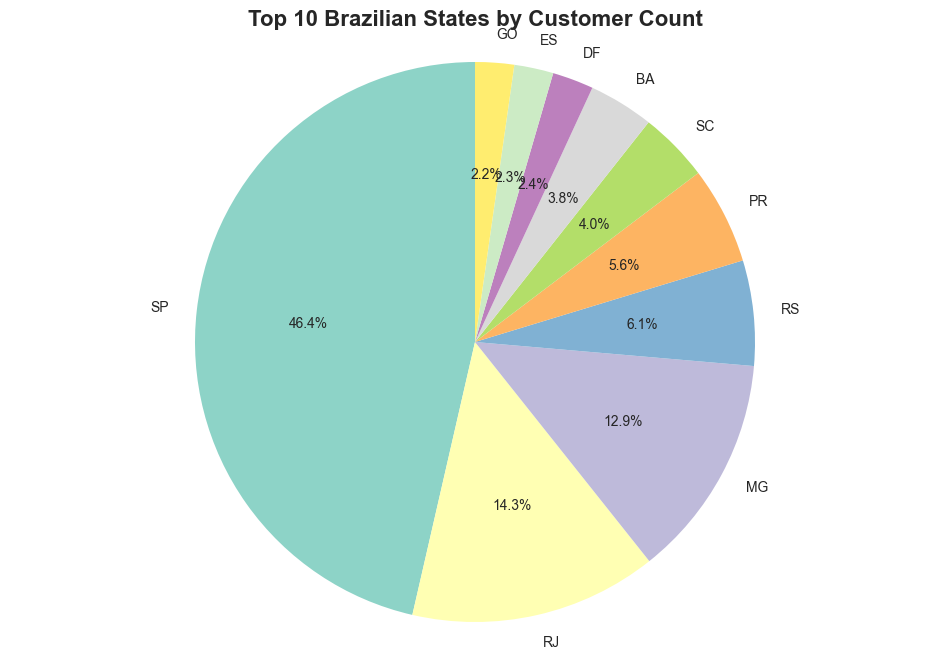

In [22]:
# 1. CUSTOMERS - Geographic Distribution
plt.figure(figsize=(12, 8))
state_counts = customers['customer_state'].value_counts().head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(state_counts)))
plt.pie(state_counts.values, labels=state_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Brazilian States by Customer Count', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

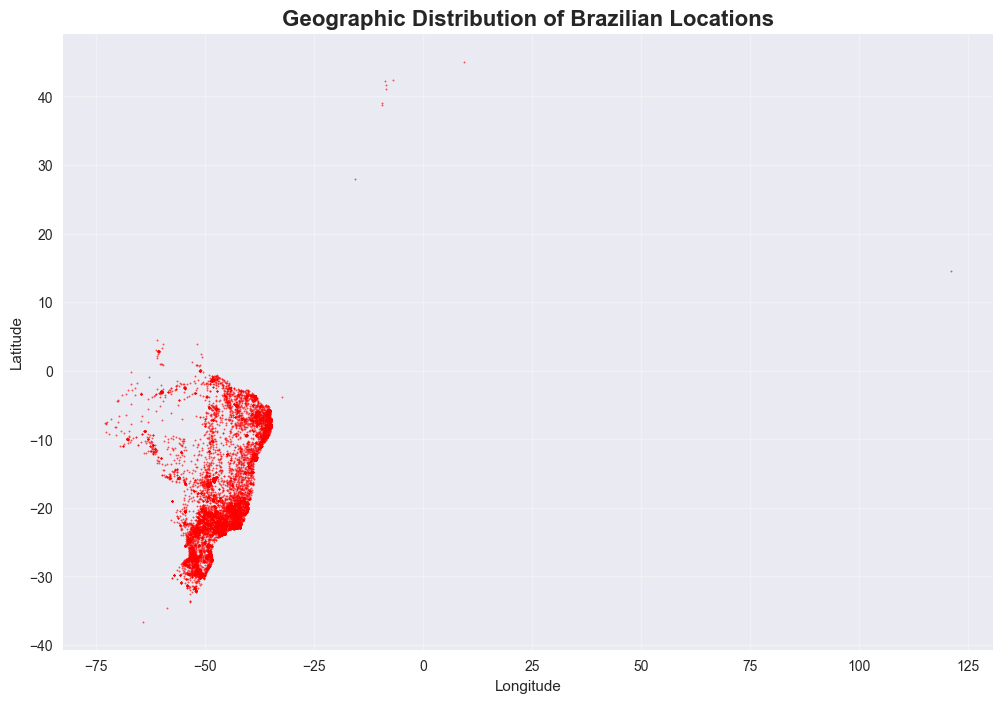

In [21]:
# 2. GEOLOCATION - Geographic Heatmap
plt.figure(figsize=(12, 8))
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], 
           alpha=0.6, s=1, c='red', marker='o')
plt.title('Geographic Distribution of Brazilian Locations', fontsize=16, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.show()

Text(0, 0.5, 'Frequency')

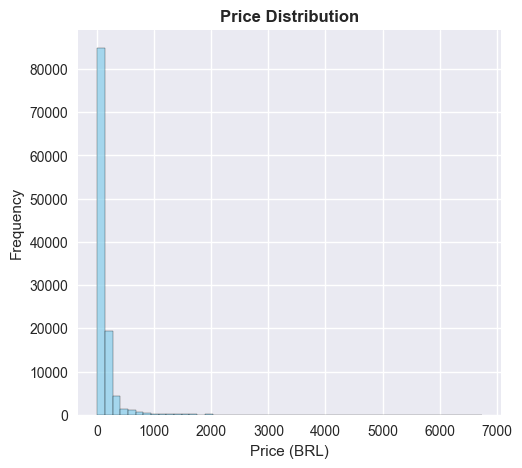

In [23]:
# 3. ORDER ITEMS - Price Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(order_items['price'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Price Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Price (BRL)')
plt.ylabel('Frequency')

C:\Users\admin\AppData\Local\Temp\ipykernel_25220\336426442.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=installment_counts.index, y=installment_counts.values, palette='Set3')


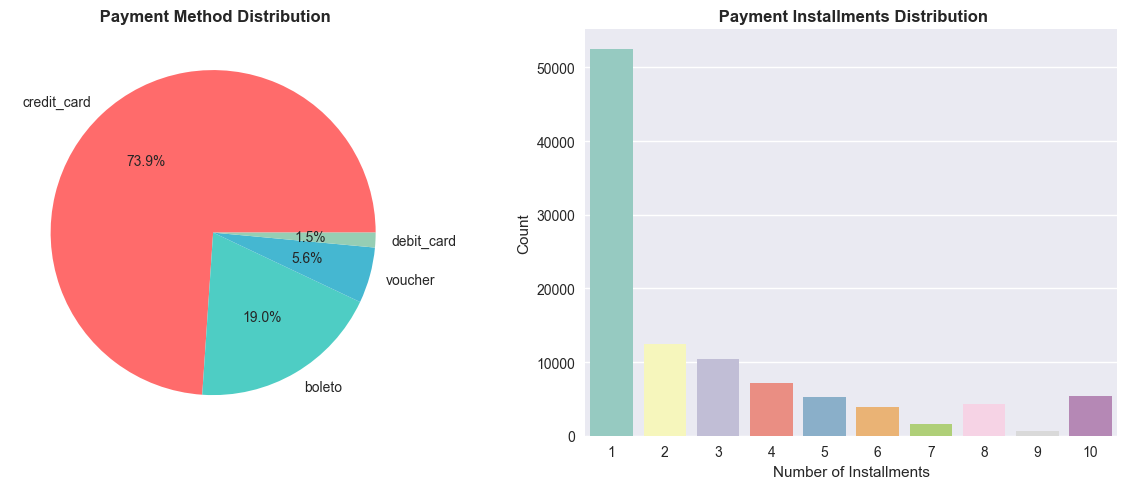

In [26]:
# 4. ORDER PAYMENTS - Payment Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
payment_counts = order_payments['payment_type'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.pie(payment_counts.values, labels=payment_counts.index, colors=colors, autopct='%1.1f%%')
plt.title(' Payment Method Distribution', fontweight='bold')

plt.subplot(1, 2, 2)
installment_counts = order_payments['payment_installments'].value_counts().head(10)
sns.barplot(x=installment_counts.index, y=installment_counts.values, palette='Set3')
plt.title(' Payment Installments Distribution', fontweight='bold')
plt.xlabel('Number of Installments')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

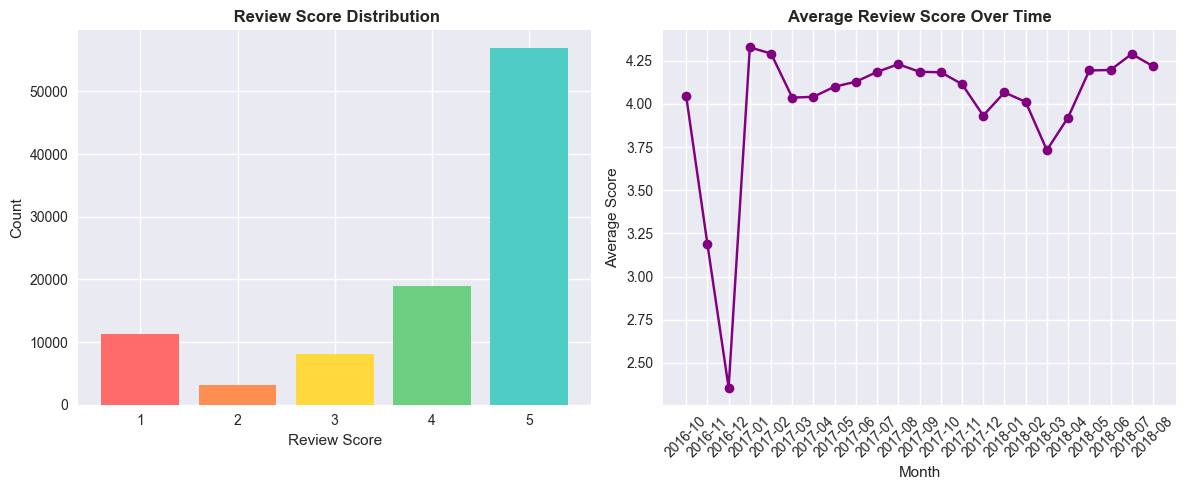

In [25]:
# 5. ORDER REVIEWS - Sentiment Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
score_counts = order_reviews['review_score'].value_counts().sort_index()
colors = ['#FF6B6B', '#FF8E53', '#FFD93D', '#6BCF7F', '#4ECDC4']
plt.bar(score_counts.index, score_counts.values, color=colors)
plt.title(' Review Score Distribution', fontweight='bold')
plt.xlabel('Review Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
order_reviews['month'] = order_reviews['review_creation_date'].dt.to_period('M')
monthly_avg = order_reviews.groupby('month')['review_score'].mean()
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, marker='o', color='purple')
plt.title('Average Review Score Over Time', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

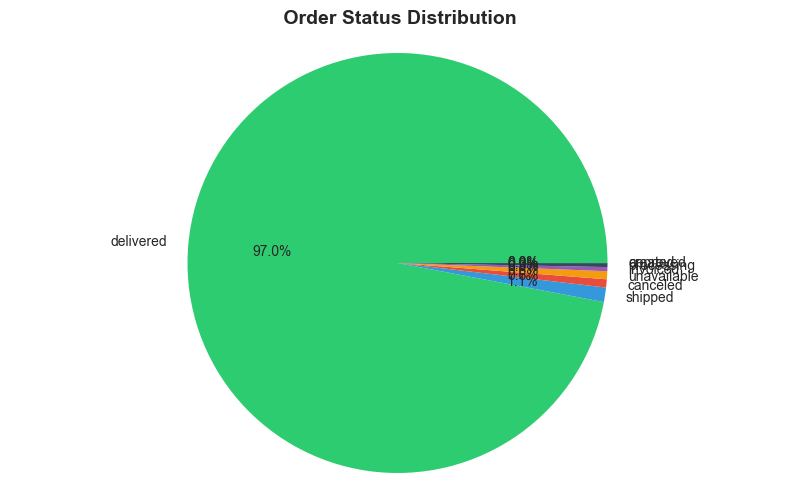

In [27]:
# 6. ORDERS - Order Status & Timeline
plt.figure(figsize=(10, 6))
status_counts = orders['order_status'].value_counts()
colors = ['#2ECC71', '#3498DB', '#E74C3C', '#F39C12', '#9B59B6', '#34495E', '#1ABC9C', '#E67E22']
plt.pie(status_counts.values, labels=status_counts.index, colors=colors, autopct='%1.1f%%')
plt.title(' Order Status Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_25220\658389226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='plasma')


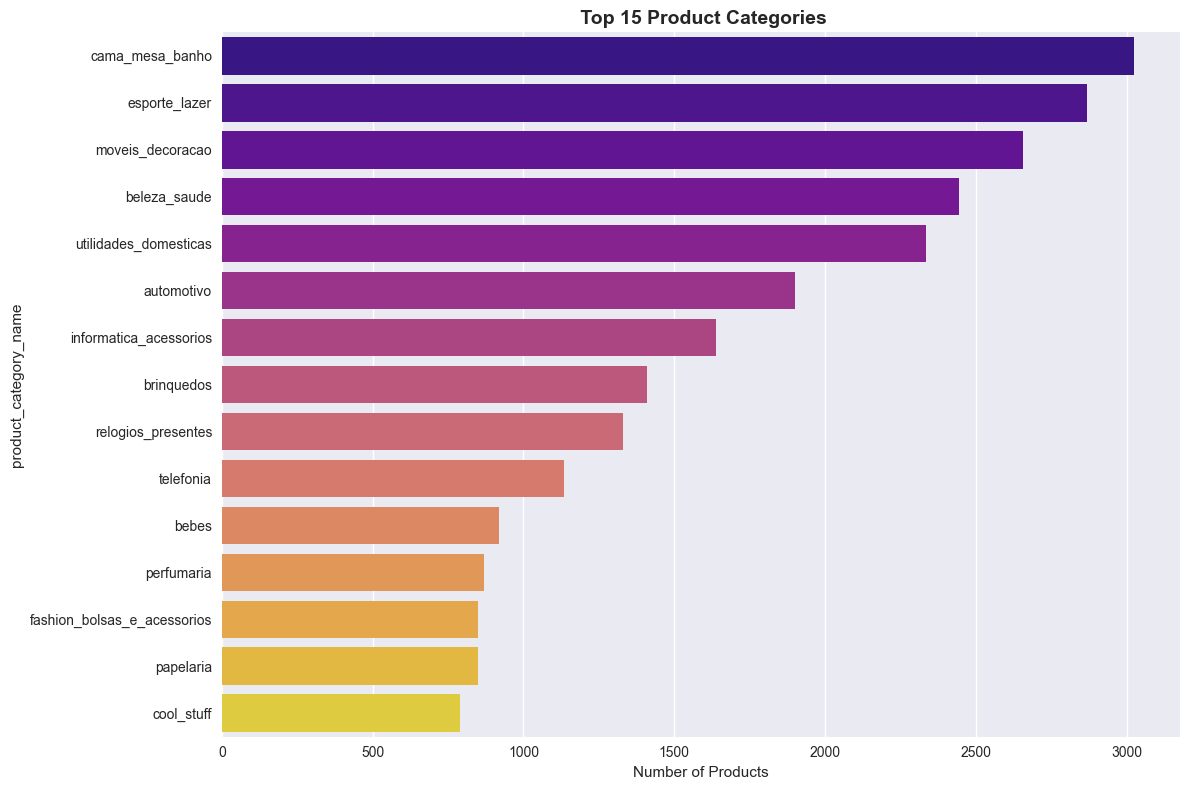

In [31]:
# 7. PRODUCTS - Category Analysis
plt.figure(figsize=(12, 8))
category_counts = products['product_category_name'].value_counts().head(15)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='plasma')
plt.title(' Top 15 Product Categories', fontsize=14, fontweight='bold')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

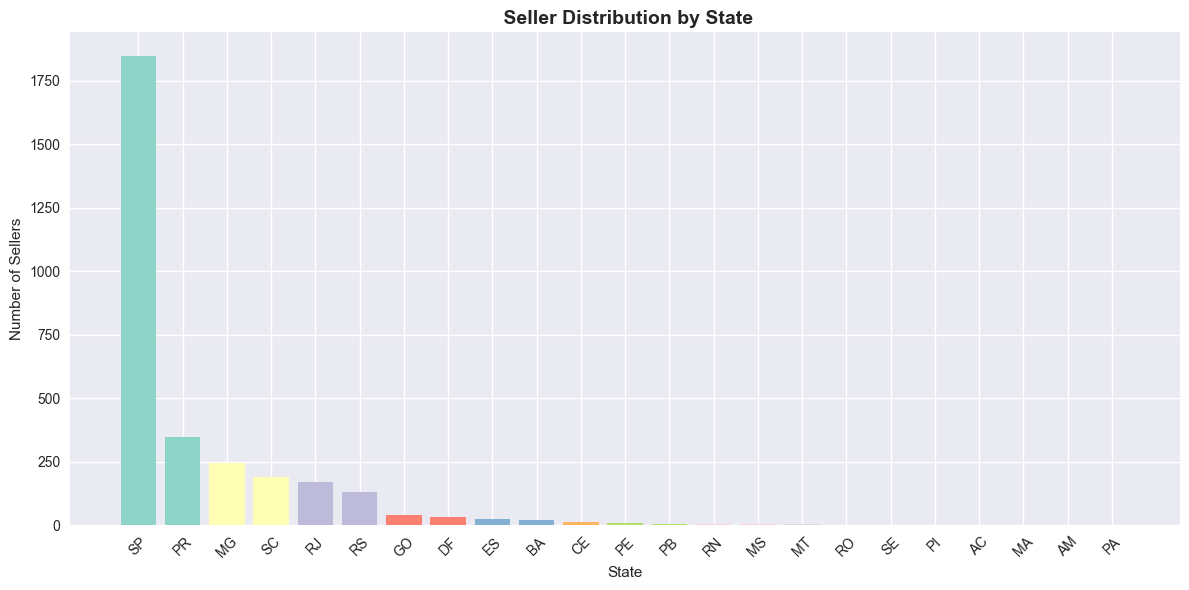

In [30]:
# 8. SELLERS - Geographic Distribution
plt.figure(figsize=(12, 6))
state_counts = sellers['seller_state'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(state_counts)))
plt.bar(state_counts.index, state_counts.values, color=colors)
plt.title(' Seller Distribution by State', fontsize=14, fontweight='bold')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ETL

In [38]:

# MySQL connection details
user = 'root' ## put your username :):)
password = 'dajana' ## put your password please
host = 'localhost'
database = 'Brazilian_ECommerce'

In [15]:


# MySQL connection details
user = 'root'
password = 'dajana'
host = 'localhost'
database = 'Brazilian_ECommerce'

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')

# 1. Customers
customers = pd.read_csv('BRAZ/gold/olist_customers_gold.csv')
customers.to_sql('olist_customers', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 2. Geolocation
geolocation = pd.read_csv('BRAZ/gold/olist_geolocation_gold.csv')
geolocation.to_sql('olist_geolocation', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 3. Order Items
order_items = pd.read_csv('BRAZ/gold/olist_order_items_gold.csv', parse_dates=['shipping_limit_date'])
order_items.to_sql('olist_order_items', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 4. Order Payments
order_payments = pd.read_csv('BRAZ/gold/olist_order_payments_gold.csv')
order_payments.to_sql('olist_order_payments', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 5. Order Reviews
order_reviews = pd.read_csv('BRAZ/gold/olist_order_reviews_gold.csv', parse_dates=['review_creation_date', 'review_answer_timestamp'])
order_reviews.to_sql('olist_order_reviews', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 6. Orders
orders = pd.read_csv('BRAZ/gold/olist_orders_gold.csv', parse_dates=[
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date'
])
orders.to_sql('olist_orders', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 7. Products
products = pd.read_csv('BRAZ/gold/olist_products_gold.csv')
# Rename columns to match SQL schema
products = products.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})
products.to_sql('olist_products', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 8. Sellers
sellers = pd.read_csv('BRAZ/gold/olist_sellers_gold.csv')
sellers.to_sql('olist_sellers', engine, if_exists='append', index=False, method='multi', chunksize=1000)

# 9. Category Translation
category_translation = pd.read_csv('BRAZ/gold/product_category_name_translation_gold.csv')
category_translation.to_sql('product_category_name_translation', engine, if_exists='append', index=False, method='multi', chunksize=1000)

print("All Gold-layer data loaded to MySQL successfully!")

All Gold-layer data loaded to MySQL successfully!


In [39]:


engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')

# Get database information
inspector = inspect(engine)
tables = inspector.get_table_names()

print("=== BRAZILIAN E-COMMERCE DATABASE SCHEMA ===\n")

for table in tables:
    print(f"TABLE: {table}")
    print("-" * 50)
    
    # Get columns
    columns = inspector.get_columns(table)
    for col in columns:
        pk_marker = " KEY" if col.get('primary_key', False) else ""
        print(f"  {col['name']}: {col['type']}{pk_marker}")
    
    # Get primary keys
    pk = inspector.get_pk_constraint(table)
    if pk['constrained_columns']:
        print(f"  PRIMARY KEY: {', '.join(pk['constrained_columns'])}")
    
    # Get foreign keys
    foreign_keys = inspector.get_foreign_keys(table)
    for fk in foreign_keys:
        print(f" FOREIGN KEY: {', '.join(fk['constrained_columns'])} -> {fk['referred_table']}.{', '.join(fk['referred_columns'])}")
    
    print(f" Total columns: {len(columns)}")
    print()

# Show relationships summary
print("=== RELATIONSHIPS SUMMARY ===")
print("olist_customers (1) ←→ (N) olist_orders")
print("olist_orders (1) ←→ (N) olist_order_items")
print("olist_orders (1) ←→ (N) olist_order_payments")
print("olist_orders (1) ←→ (N) olist_order_reviews")
print("olist_products (1) ←→ (N) olist_order_items")
print("olist_sellers (1) ←→ (N) olist_order_items")
print("product_category_name_translation (1) ←→ (N) olist_products")
print("olist_geolocation (standalone reference table)")

=== BRAZILIAN E-COMMERCE DATABASE SCHEMA ===

TABLE: olist_customers
--------------------------------------------------
  customer_id: VARCHAR(50)
  customer_unique_id: VARCHAR(50)
  customer_zip_code_prefix: INTEGER
  customer_city: VARCHAR(50)
  customer_state: VARCHAR(2)
  PRIMARY KEY: customer_id
 Total columns: 5

TABLE: olist_geolocation
--------------------------------------------------
  geolocation_id: INTEGER
  geolocation_zip_code_prefix: INTEGER
  geolocation_lat: FLOAT
  geolocation_lng: FLOAT
  geolocation_city: VARCHAR(50)
  geolocation_state: VARCHAR(2)
  PRIMARY KEY: geolocation_id
 Total columns: 6

TABLE: olist_order_items
--------------------------------------------------
  order_id: VARCHAR(50)
  order_item_id: INTEGER
  product_id: VARCHAR(50)
  seller_id: VARCHAR(50)
  shipping_limit_date: DATETIME
  price: FLOAT
  freight_value: FLOAT
  PRIMARY KEY: order_id, order_item_id
 FOREIGN KEY: order_id -> olist_orders.order_id
 FOREIGN KEY: product_id -> olist_products